In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as ax
import seaborn as sns
from DataPreprocessing import DataPreprocessingClass
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)


In [2]:
plt.rcParams["figure.figsize"]=18,18

In [3]:
df = pd.read_csv('data/train.tsv', sep='\t')
df.head(3)

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."


In [4]:
dp = DataPreprocessingClass(df)
dp.data.head()

,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,logRevenue,genresIDs,prodCompIDs,collectionID,isInCollection,year,month,castIDs,topActorsNum,director,directorID,directorCat,popularKeywordsIDs,profitableKeywordsIDs,profitableKeywordsNum
0,2.580000e+08,559,22.024,890871626,139.0,Spider-Man 3,6.2,8180,20.607711,"[14, 28, 12]","[19551, 5, 326, 34]",556,1,2007,5,"[1480150, 7628, 116627, 1451076, 1781288, 1739...",40,Sam Raimi,7623,9,"[9663, 9748, 697, 9717, 9715, 2038, 1453, 851,...","[5776, 5789, 5857, 255116, 1965, 9715, 9717, 8...",12
1,2.500000e+05,50719,4.756,154323,88.0,"Silent Night, Deadly Night Part 2",4.3,68,11.946803,"[35, 27]",[18924],256296,1,1987,4,[2072],1,Lee Harry,213404,0,"[9826, 9663, 10714, 207317, 65, 11181, 1991, 1...",[9663],1
2,2.979671e+07,469062,4.746,176236,98.0,Scotty and the Secret History of Hollywood,6.5,15,12.079579,[99],[88564],-1,0,2018,7,[11275],1,Matt Tyrnauer,1116251,0,[158718],[],0
3,1.000000e+06,9003,13.828,14564027,94.0,Hellraiser,6.9,1115,16.494065,[27],"[1950, 15338, 15339, 15340]",8917,1,1987,9,[40043],1,Clive Barker,31211,9,"[9748, 34117, 6152, 3182, 15001, 1449, 10327, ...",[],0
4,1.500000e+07,11153,15.070,61399552,99.0,National Lampoon's Vacation,7.1,782,17.932913,"[35, 12]",[174],108693,1,1983,7,"[26510, 1904]",2,Harold Ramis,1524,9,"[179431, 7312, 33694, 14724, 158340]",[158340],1


In [5]:
data = dp.data

# Plans:

    1) Graphs:

    Done    Genre / revenue 
    Done    Director / revenue (Create Director categories) 
    Production company / revenue (Create prod Company categories)
    Done    Number of ProfitableKeywords /revenue (Create ProfitableKeywords categories)
    Done    Year / revenue
    YearAverageRevenue / revenue
    Top
    Month / revenue
2) Matrix plot

# Year
Number of movies grows every year, as you can see here:

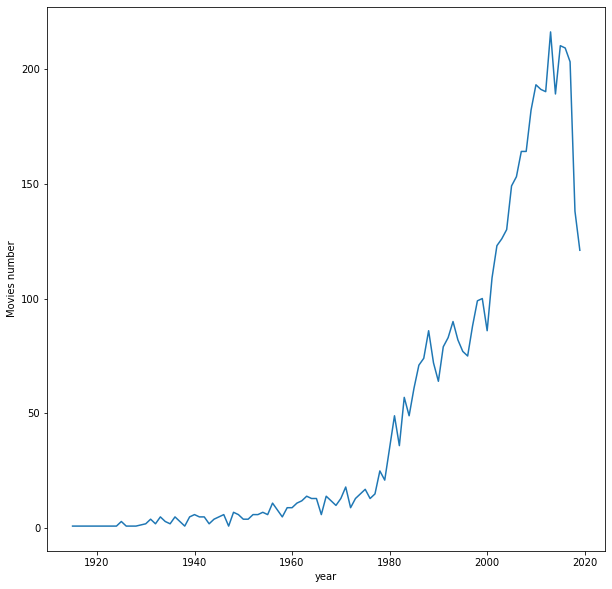

In [6]:
grpd = data.groupby(['year']).size().to_frame('size').reset_index()
plt.figure(figsize=(10,10))
PLT01 = sns.lineplot(x="year", y="size", data=grpd)
PLT01.set(ylabel='Movies number')
pass

### Also we can see growth in number of Blockbuster movies, average Year revenue and average year budgets

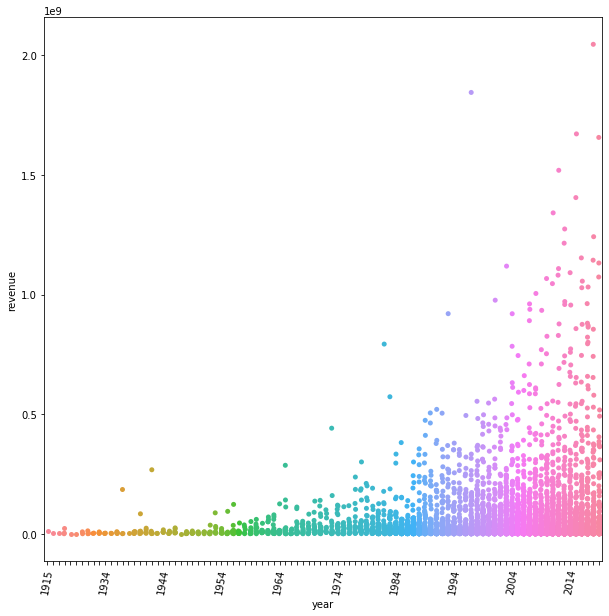

In [7]:
plt.figure(figsize=(10,10))
PLT02 = sns.stripplot(x="year", y="revenue", data=data)
PLT02.set_xticklabels(PLT02.get_xticklabels(), rotation=80)
for ind, label in enumerate(PLT02.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass

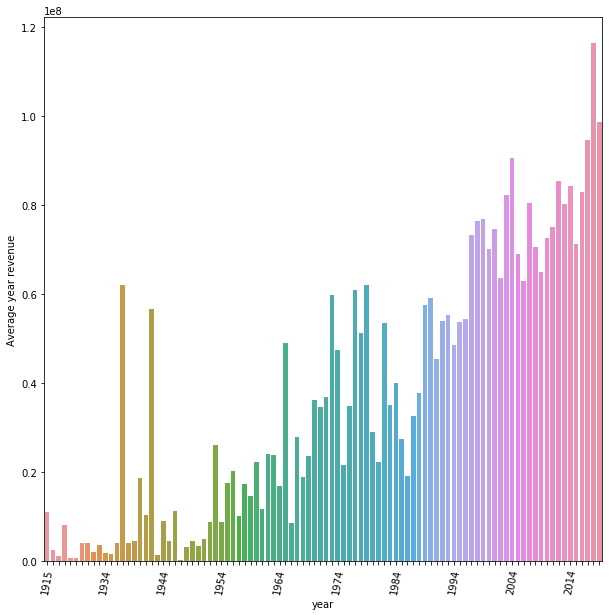

In [8]:
year_revenue_df = data[['year', 'revenue']].groupby(['year']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT03 = sns.barplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.regplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.stripplot(x="year", y="revenue", data=year_revenue_df)
PLT03.set_xticklabels(PLT03.get_xticklabels(), rotation=80)
PLT03.set(ylabel='Average year revenue')
# PLT03.set_yscale("log")
for ind, label in enumerate(PLT03.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass

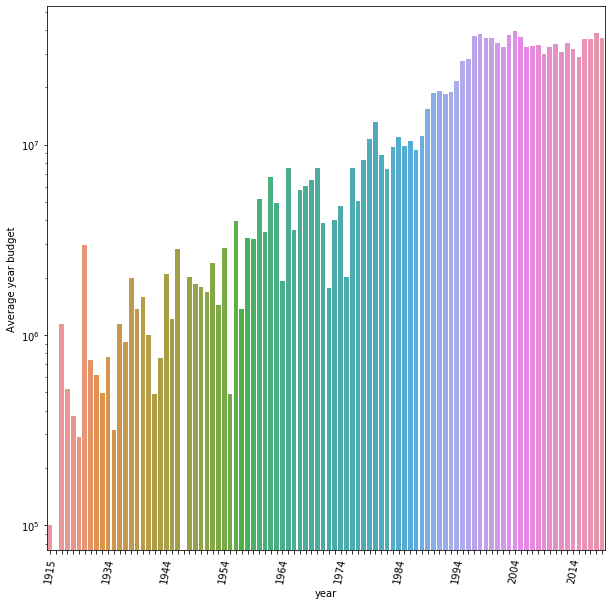

In [9]:
year_revenue_df = data[['year', 'budget']].groupby(['year']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT04 = sns.barplot(x="year", y="budget", data=year_revenue_df)
# PLT03 = sns.regplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.stripplot(x="year", y="revenue", data=year_revenue_df)
PLT04.set_xticklabels(PLT04.get_xticklabels(), rotation=80)
PLT04.set(ylabel='Average year budget')
PLT04.set_yscale("log")
for ind, label in enumerate(PLT04.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass

# Month 

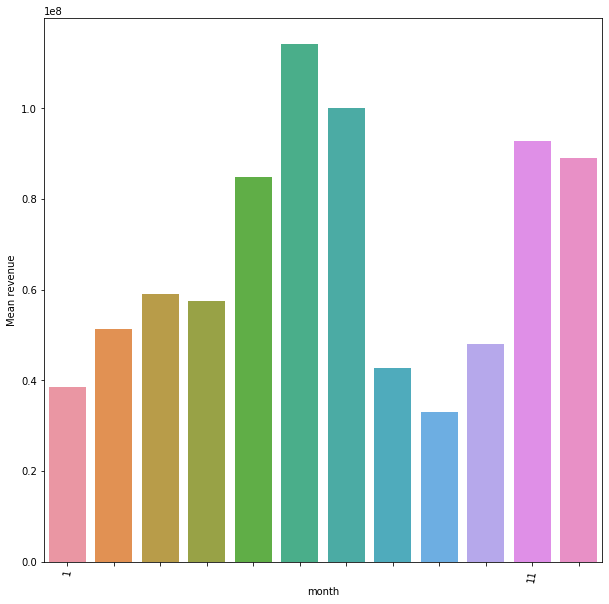

In [10]:
month_revenue_df = data[['month', 'revenue']].groupby(['month']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT04 = sns.barplot(x="month", y="revenue", data=month_revenue_df)
PLT04.set_xticklabels(PLT04.get_xticklabels(), rotation=80)
PLT04.set(ylabel='Mean revenue')

for ind, label in enumerate(PLT04.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass


# Genres

In [11]:
# geners_rev_df generation
geners_rev_df = pd.DataFrame(columns = ['genre', 'revenue'])
for index, row in data[['genresIDs','revenue']].iterrows():
    for gid in row['genresIDs']:
        geners_rev_df = geners_rev_df.append({'genre': dp.genres_dict[gid], 'revenue':row['revenue']},ignore_index=True)
geners_rev_df['revenue'] =  pd.to_numeric(geners_rev_df['revenue'])
# print(geners_rev_df.head())
# mean_rev = dp.profitFromField('genresIDs')
# dp.genres_dict

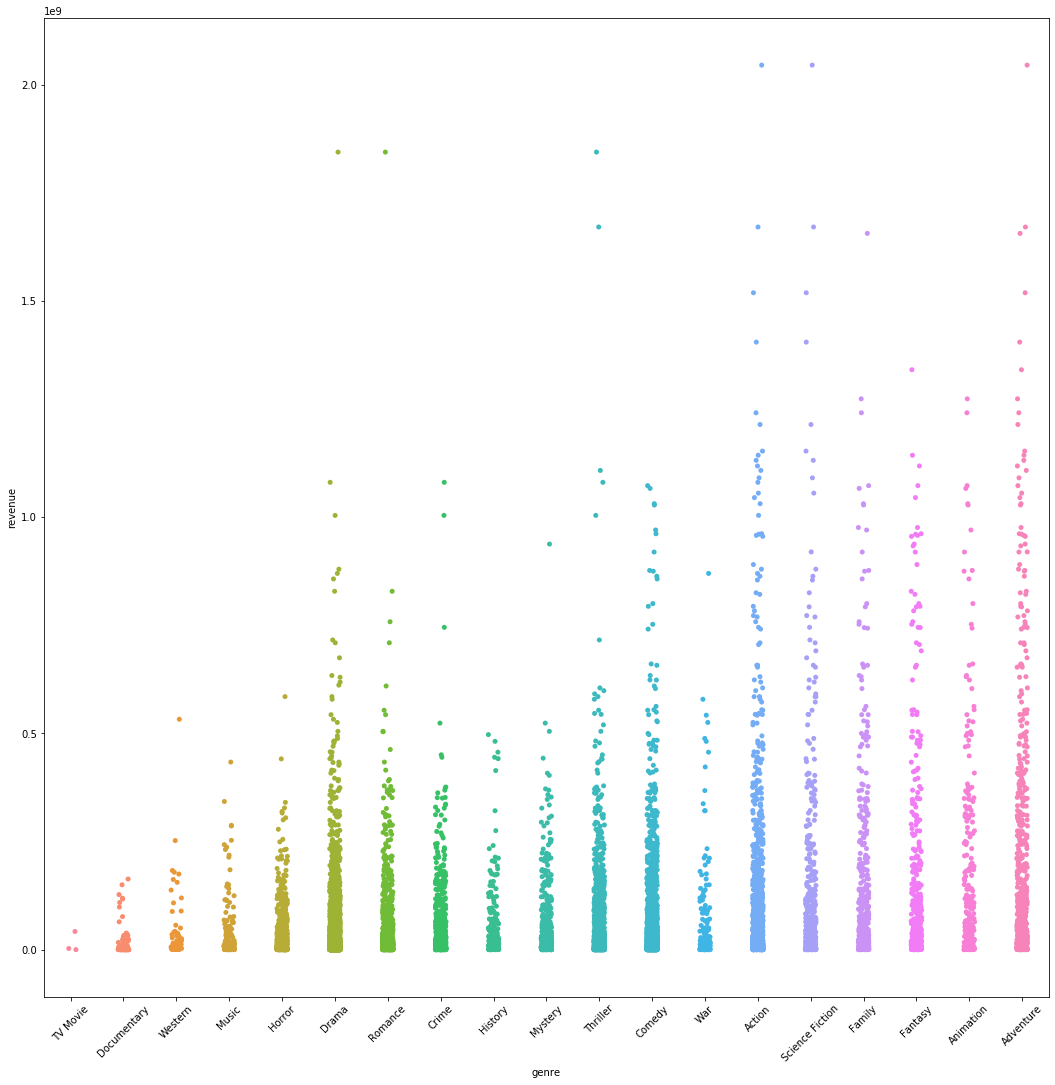

In [12]:
order = ['TV Movie', 'Documentary', 'Western', 'Music', 'Horror', 'Drama', 'Romance',
 'Crime', 'History', 'Mystery', 'Thriller', 'Comedy', 'War', 'Action',
 'Science Fiction', 'Family', 'Fantasy', 'Animation', 'Adventure']
PLT = sns.stripplot(x="genre", y="revenue", data=geners_rev_df, order=order)
PLT.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT

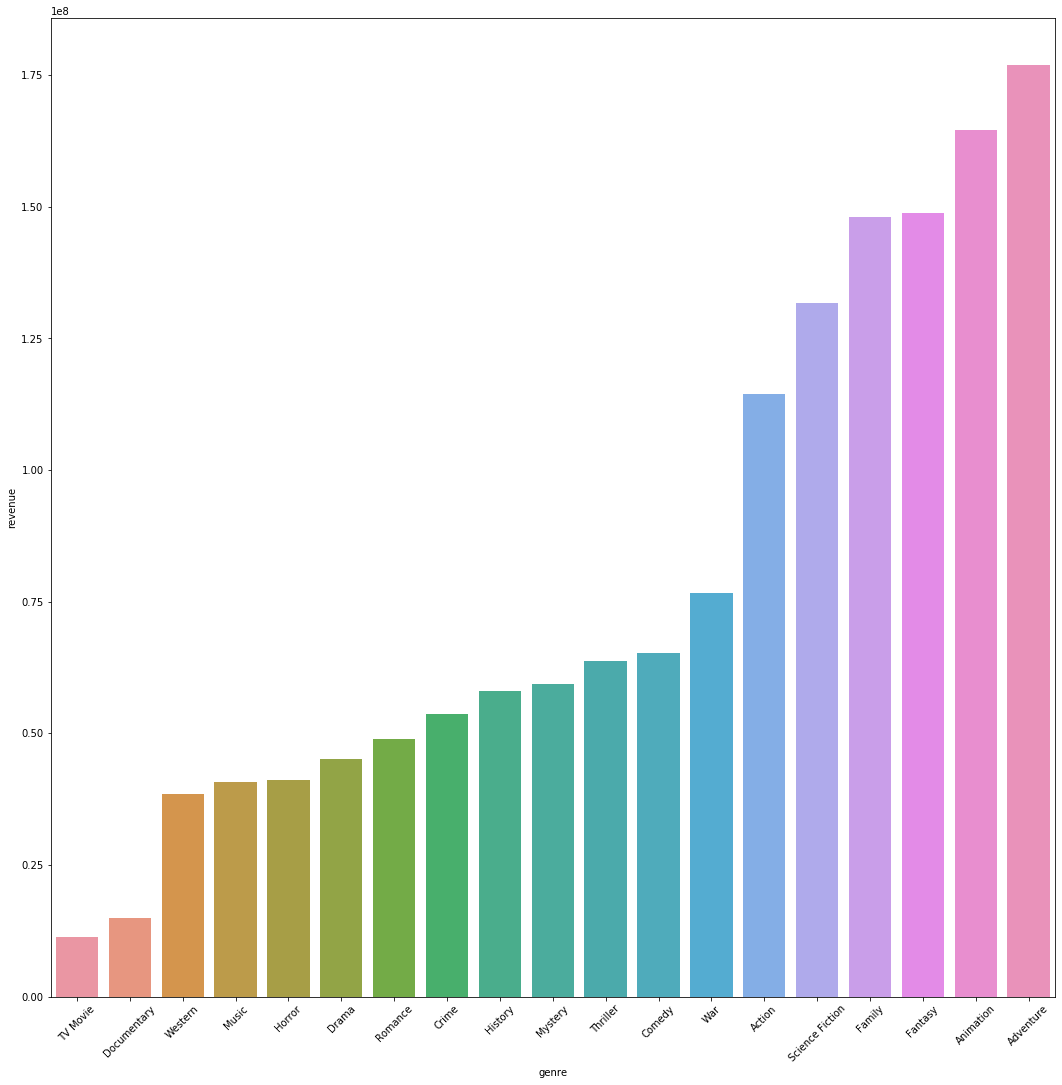

In [13]:
# By mean revenue:
ploted_data = geners_rev_df.groupby('genre').mean().reset_index().sort_values('revenue')
# print(ploted_data['genre'].values)
PLT2 = sns.barplot(x="genre", y="revenue", data= ploted_data)
PLT2.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT2

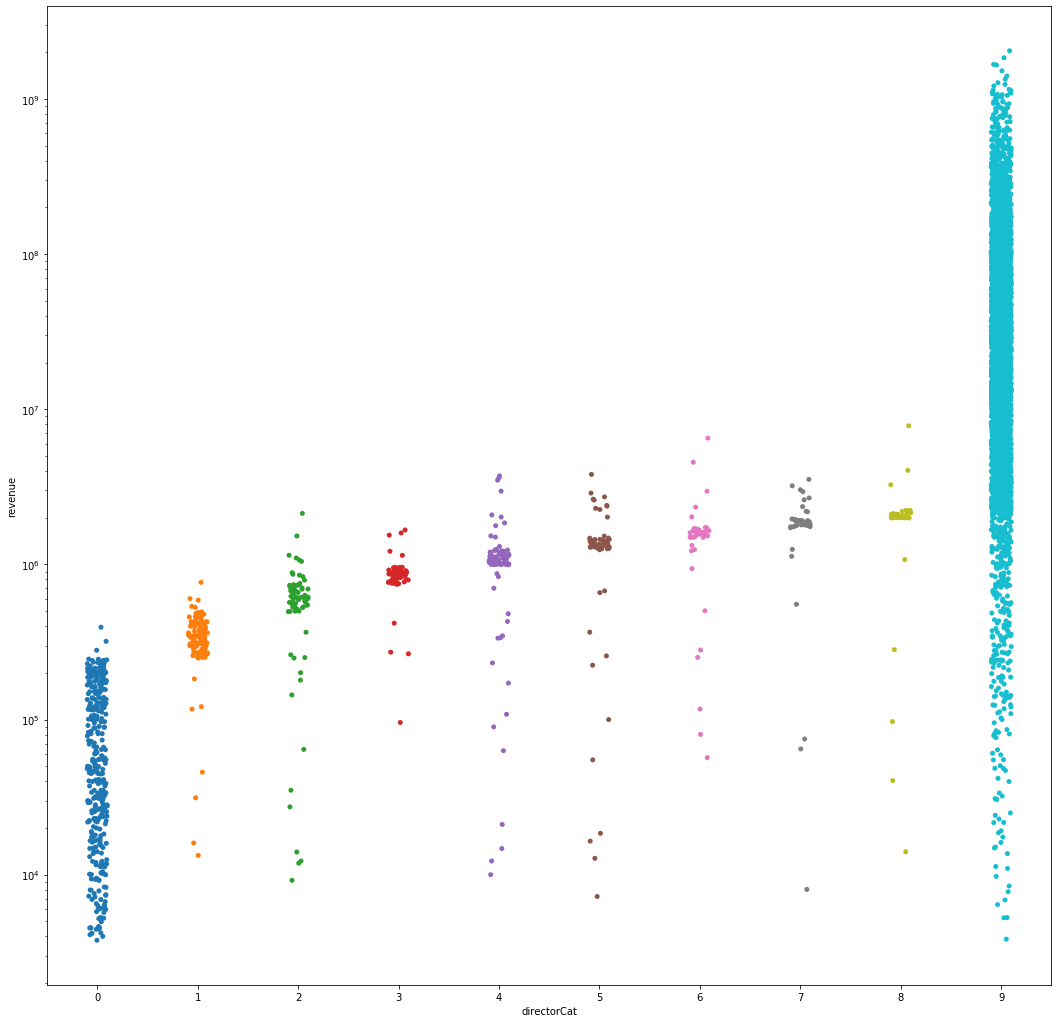

In [14]:
PLT3 = sns.stripplot(x="directorCat", y="revenue", data=data)
PLT3.set_yscale("log")

# Corellation plots:

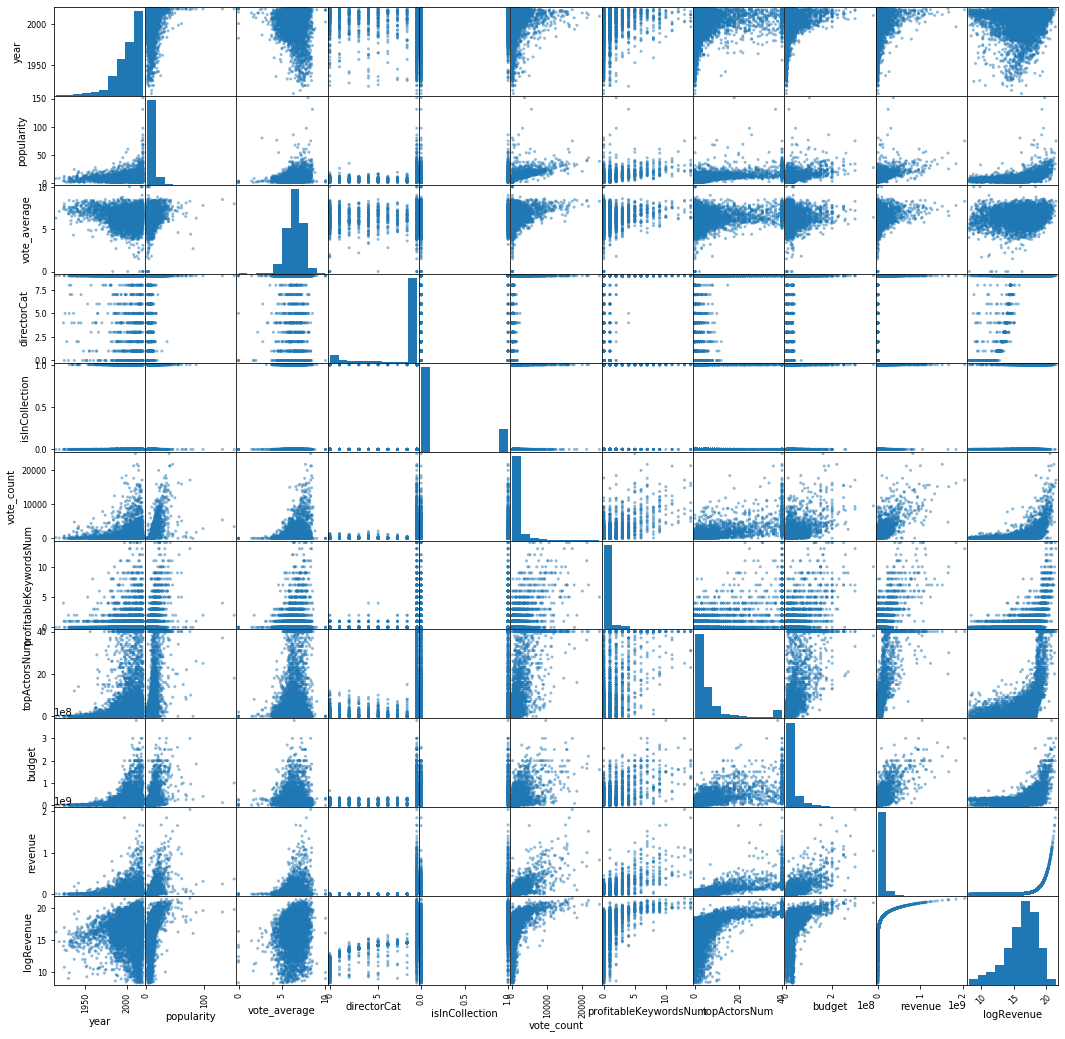

In [31]:
numerical_df = data[[ 'year', 'popularity', 'vote_average', 'directorCat', 'isInCollection','vote_count',  'profitableKeywordsNum','topActorsNum','budget', 'revenue', 'logRevenue']]
pd.plotting.scatter_matrix(numerical_df)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

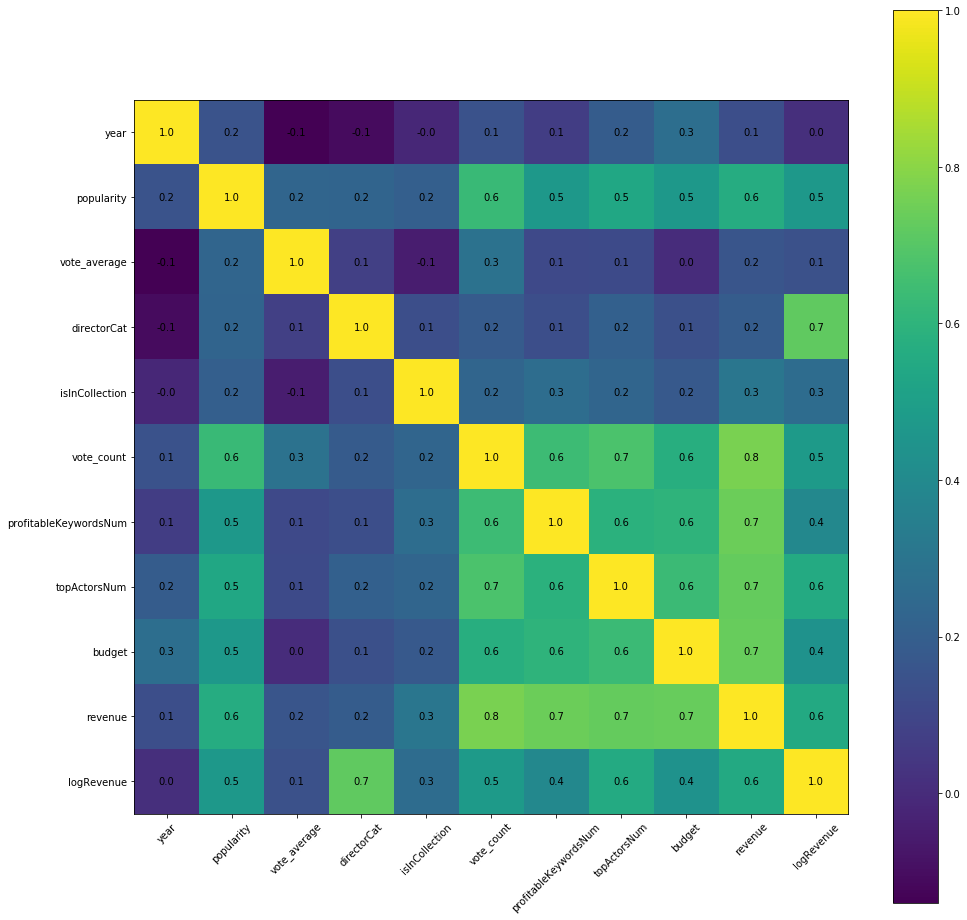

In [26]:
PLT_5 = plt.matshow(numerical_df.corr())
plt.xticks(range(len(numerical_df.columns)), numerical_df.columns)
plt.yticks(range(len(numerical_df.columns)), numerical_df.columns)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.colorbar()
plt.xticks(rotation=45)
for (i, j), z in np.ndenumerate(numerical_df.corr()):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

## Collection influence in general case:

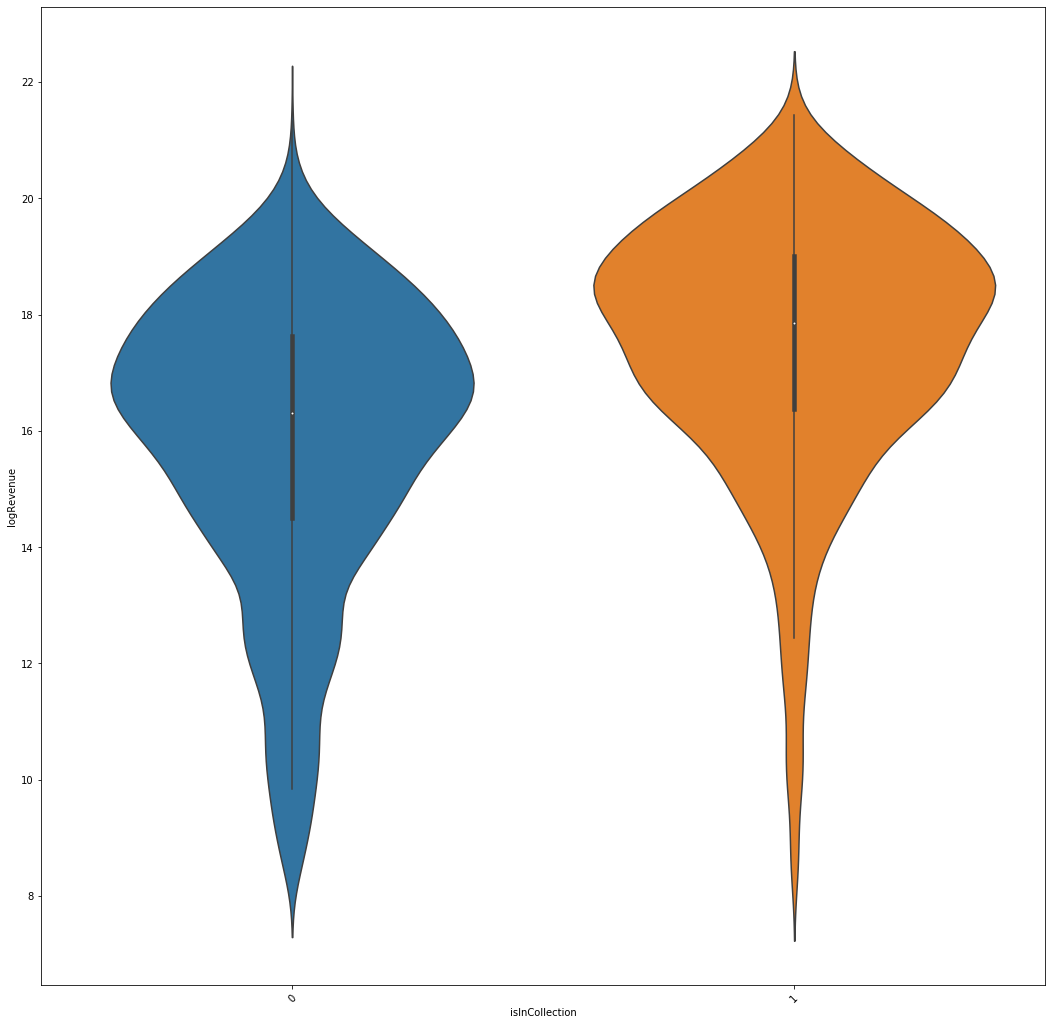

In [36]:
# PLT6 = sns.stripplot(x="isInCollection", y="revenue", data=data)
# By mean revenue:
# ploted_data = data.groupby('isInCollection').mean().reset_index().sort_values('revenue')
# PLT6 = sns.boxplot(x="isInCollection", y="revenue", data= ploted_data)
# PLT6.set_xticklabels(PLT6.get_xticklabels(), rotation=45)
# PLT6

PLT61 = sns.violinplot(x="isInCollection", y="logRevenue", data = data)
PLT61.set_xticklabels(PLT61.get_xticklabels(), rotation=45)
PLT61

# profitable Keywords number influence:

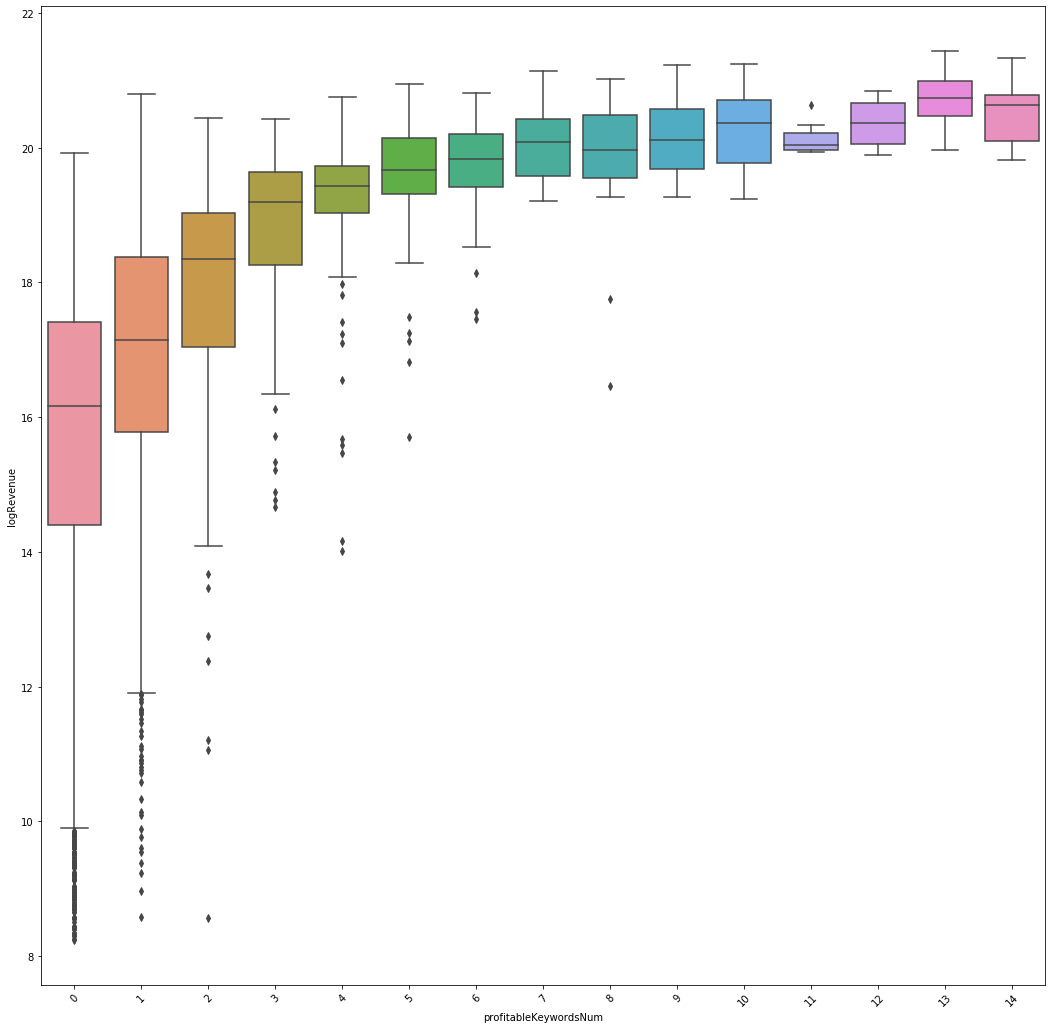

In [28]:
# ploted_data = data.groupby('profitableKeywordsNum').mean().reset_index().sort_values('revenue')
PLT7 = sns.boxplot(x="profitableKeywordsNum", y="logRevenue", data= data)
PLT7.set_xticklabels(PLT7.get_xticklabels(), rotation=45)
PLT7

# profitable Actors number influence:

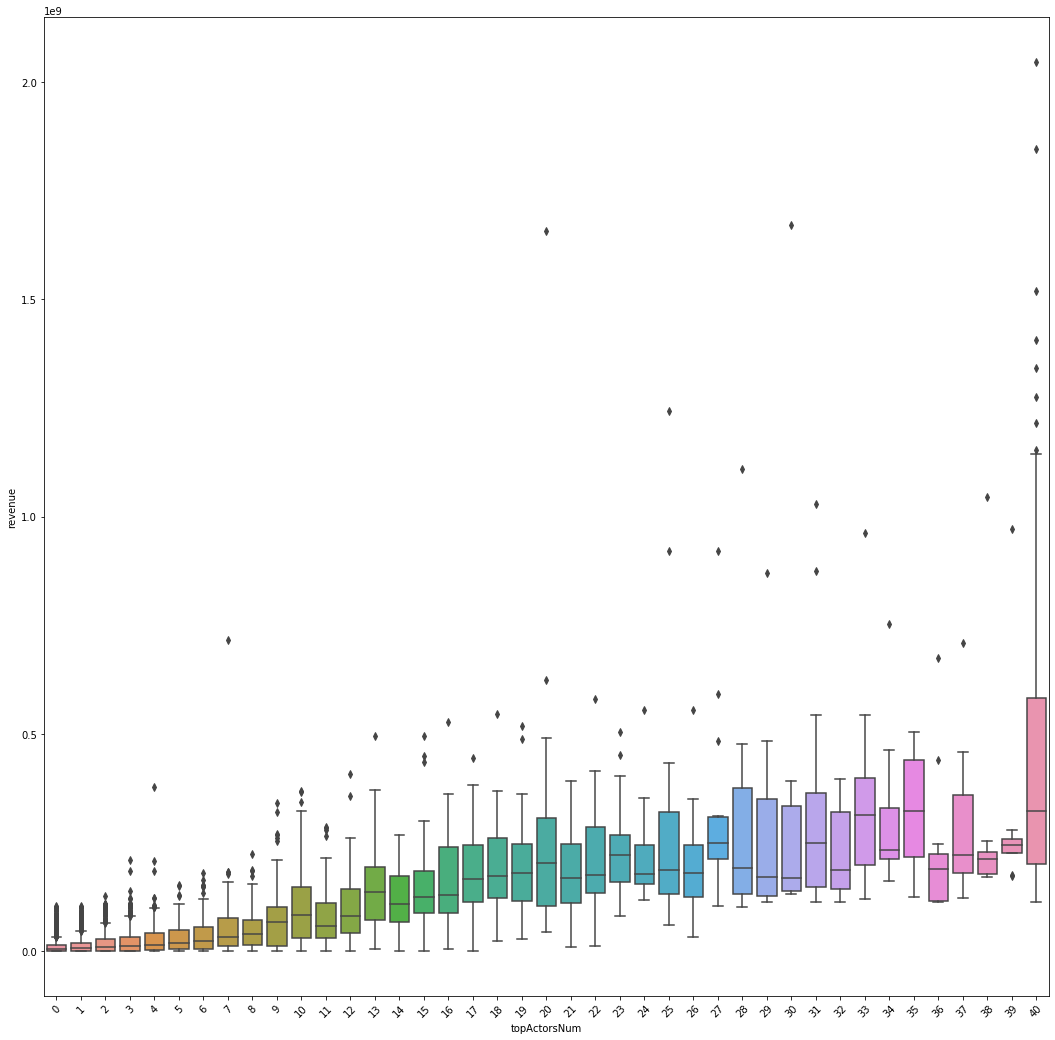

In [29]:
ploted_data = data.groupby('topActorsNum').mean().reset_index().sort_values('revenue')
PLT8 = sns.boxplot(x="topActorsNum", y="revenue", data= data)
PLT8.set_xticklabels(PLT8.get_xticklabels(), rotation=45)
PLT8